<a href="https://colab.research.google.com/github/BryanAlexanderSoetanto/Portfolio-Data-Analytics-Essentials/blob/main/Titanic_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Memuat Dataset
# Dataset Titanic tersedia secara built-in di library Seaborn
titanic = sns.load_dataset('titanic')

# Menampilkan 5 baris pertama dataset untuk memahami struktur data
print("5 Baris Pertama Dataset Titanic:")
print(titanic.head())
print(titanic.tail())


# Buat kolom baru 'sex_numeric'
# Ubah 'male' menjadi 1 dan 'female' menjadi 0
titanic['sex_numeric'] = titanic['sex'].map({'male': 1, 'female': 0})

# Tampilkan beberapa baris pertama untuk verifikasi
print(titanic[['sex', 'sex_numeric']].head())

# Menampilkan 5 baris pertama dataset untuk memahami struktur data
print("5 Baris Pertama Dataset Titanic:")
print(titanic.head())



5 Baris Pertama Dataset Titanic:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  1

In [ ]:
# Mendapatkan daftar dataset yang tersedia di Seaborn
datasets = sns.get_dataset_names()

# Menampilkan daftar dataset
for dataset in datasets:
    print(dataset)

anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


In [ ]:
# 2. Informasi Dasar dan Statistik Deskriptif
print("\nInformasi Dataset:")
print(titanic.info())

print("\nStatistik Deskriptif untuk Kolom Numerik:")
print(titanic.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  sex_numeric  891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 87.6+ KB
None

Statistik 


Jumlah Missing Values per Kolom:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
sex_numeric      0
dtype: int64


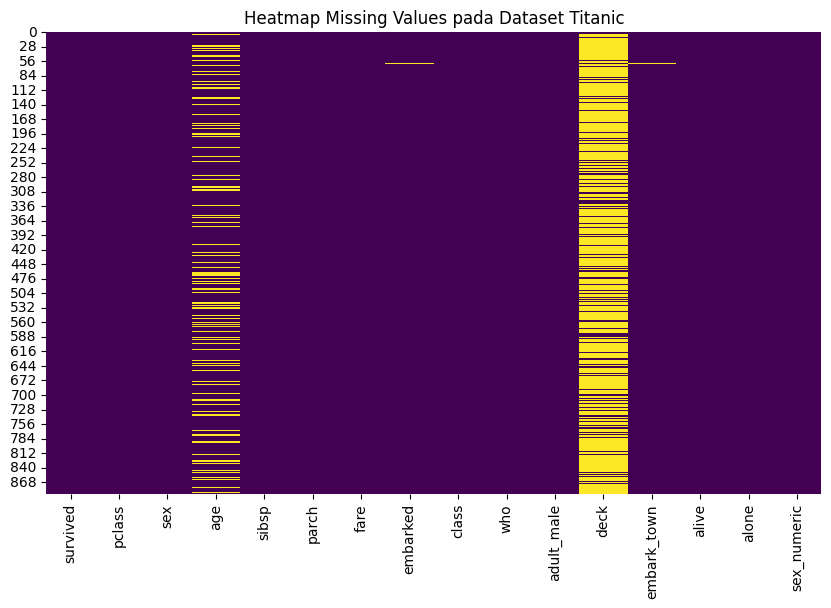

In [ ]:
# 3. Analisis Missing Values
# Menghitung jumlah missing values per kolom
missing_values = titanic.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)

# Visualisasi missing values menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Missing Values pada Dataset Titanic")
plt.show()

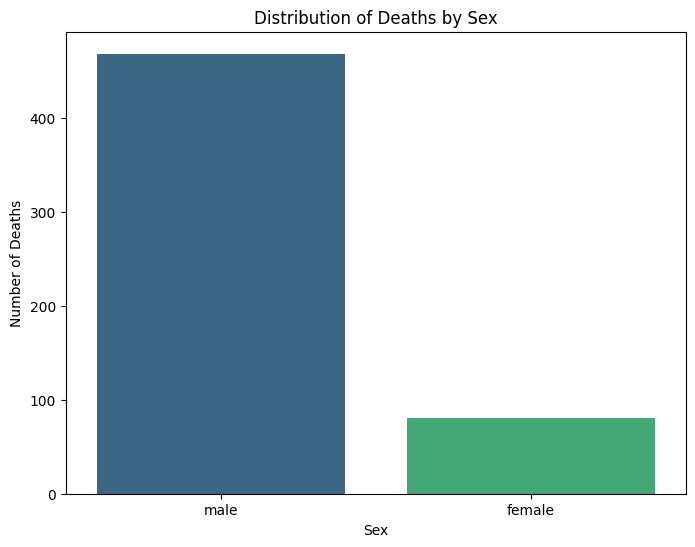

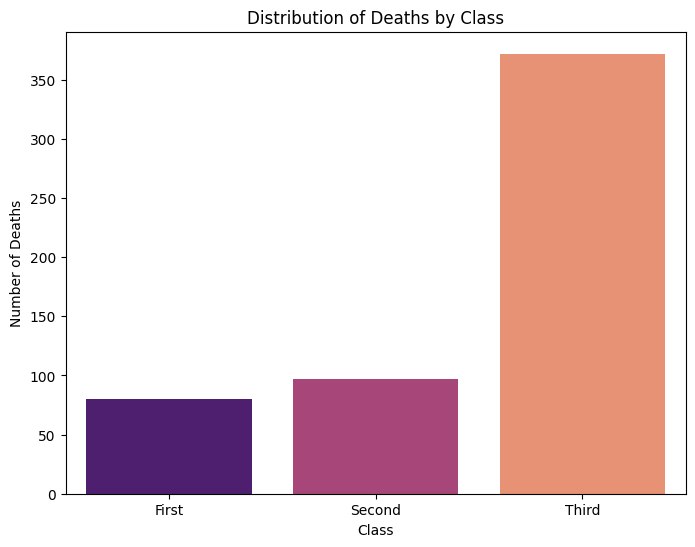

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas as it might be needed for map()

# Re-load the titanic dataset and apply previous transformations to ensure it's defined
titanic = sns.load_dataset('titanic')
titanic['sex_numeric'] = titanic['sex'].map({'male': 1, 'female': 0})

# 1. Filter the titanic DataFrame to include only passengers who did not survive
death_df = titanic[titanic['survived'] == 0]

# 2. Create a count plot for the 'sex' column of the filtered DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=death_df, palette='viridis', hue='sex', legend=False)
plt.title('Distribution of Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Deaths')
plt.show()

# 3. Create another count plot for the 'class' column of the filtered DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=death_df, palette='magma', hue='class', legend=False)
plt.title('Distribution of Deaths by Class')
plt.xlabel('Class')
plt.ylabel('Number of Deaths')
plt.show()

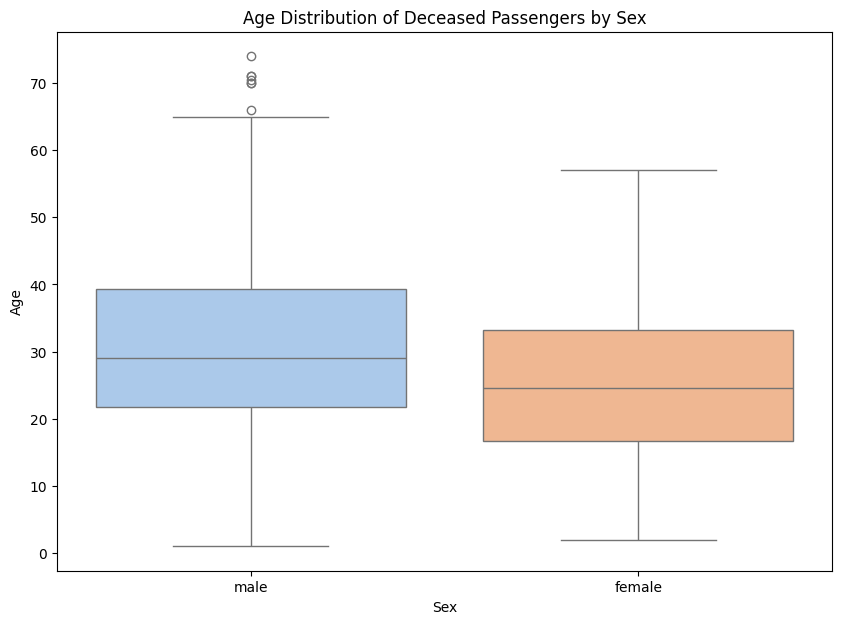

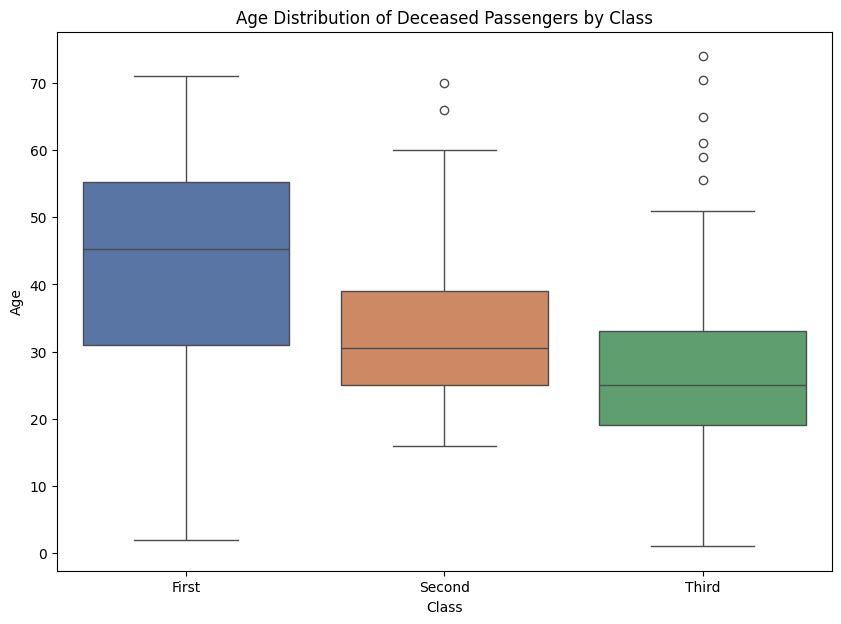

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot 1: Age distribution of deceased passengers by Sex
plt.figure(figsize=(10, 7))
sns.boxplot(x='sex', y='age', data=death_df, palette='pastel', hue='sex', legend=False)
plt.title('Age Distribution of Deceased Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# Box plot 2: Age distribution of deceased passengers by Class
plt.figure(figsize=(10, 7))
sns.boxplot(x='class', y='age', data=death_df, palette='deep', hue='class', legend=False)
plt.title('Age Distribution of Deceased Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

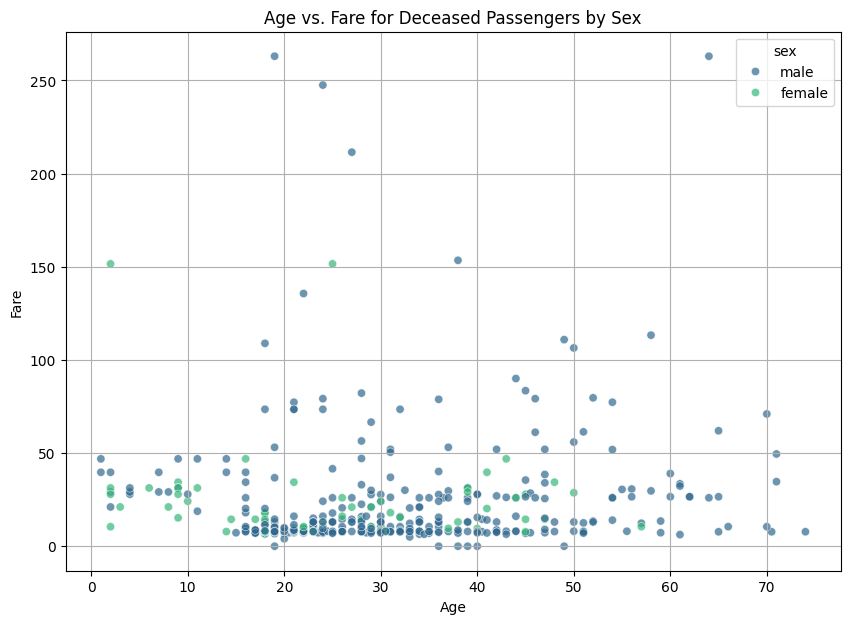

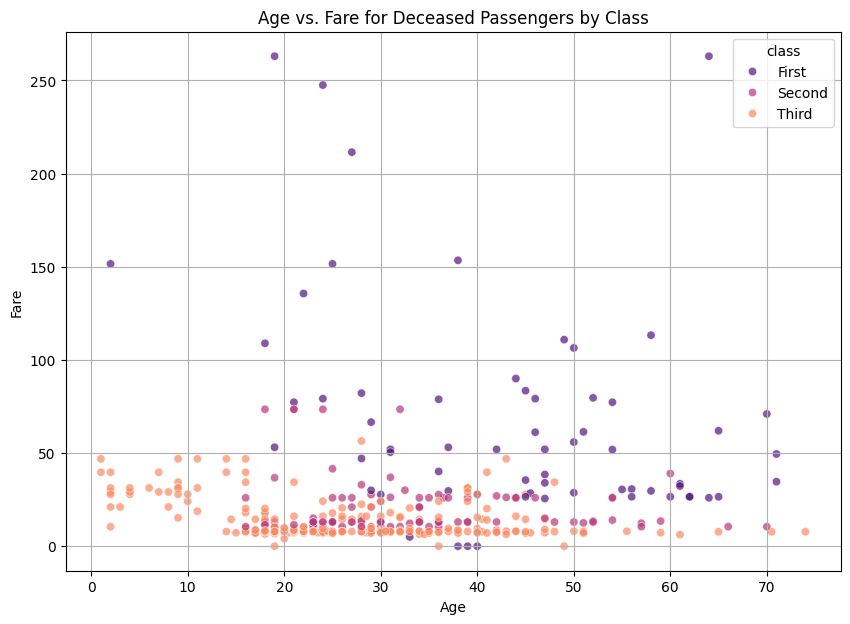

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for deceased passengers, colored by 'sex'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='fare', hue='sex', data=death_df, palette='viridis', alpha=0.7)
plt.title('Age vs. Fare for Deceased Passengers by Sex')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# Create a scatter plot for deceased passengers, colored by 'class'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='fare', hue='class', data=death_df, palette='magma', alpha=0.7)
plt.title('Age vs. Fare for Deceased Passengers by Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

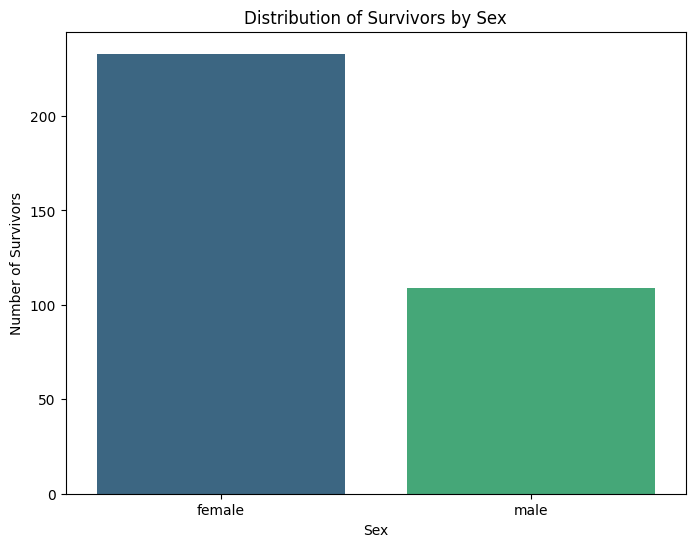

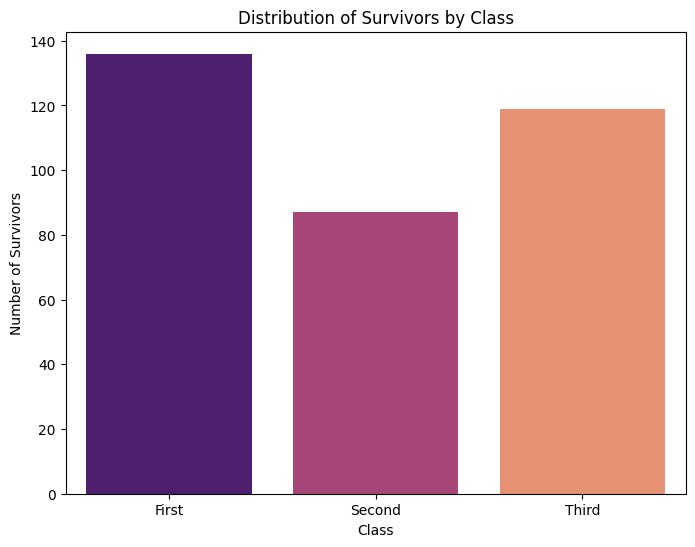

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter the titanic DataFrame to include only passengers who did survive
survivors_df = titanic[titanic['survived'] == 1]

# 2. Create a count plot for the 'sex' column of the filtered DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=survivors_df, palette='viridis', hue='sex', legend=False)
plt.title('Distribution of Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.show()

# 3. Create another count plot for the 'class' column of the filtered DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=survivors_df, palette='magma', hue='class', legend=False)
plt.title('Distribution of Survivors by Class')
plt.xlabel('Class')
plt.ylabel('Number of Survivors')
plt.show()

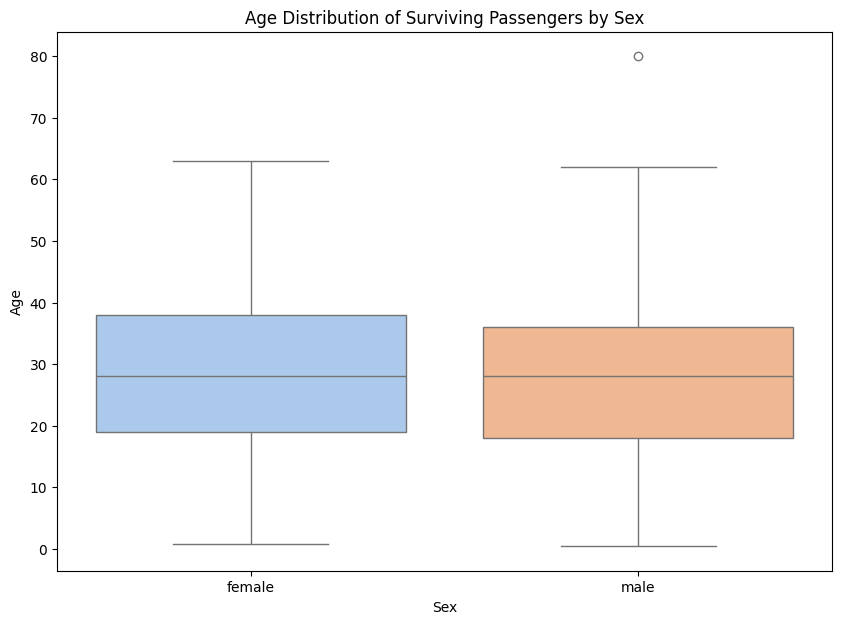

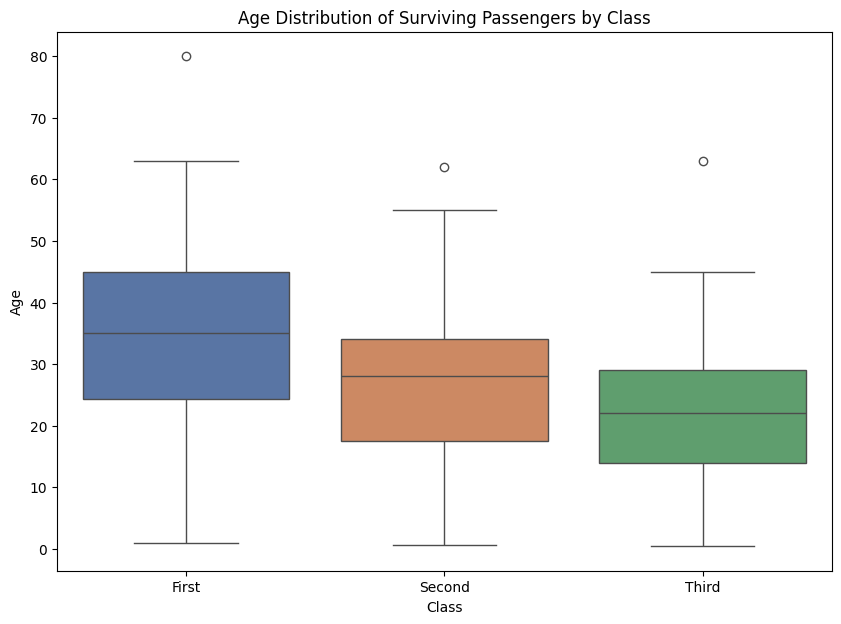

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot 1: Age distribution of surviving passengers by Sex
plt.figure(figsize=(10, 7))
sns.boxplot(x='sex', y='age', data=survivors_df, palette='pastel', hue='sex', legend=False)
plt.title('Age Distribution of Surviving Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# Box plot 2: Age distribution of surviving passengers by Class
plt.figure(figsize=(10, 7))
sns.boxplot(x='class', y='age', data=survivors_df, palette='deep', hue='class', legend=False)
plt.title('Age Distribution of Surviving Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

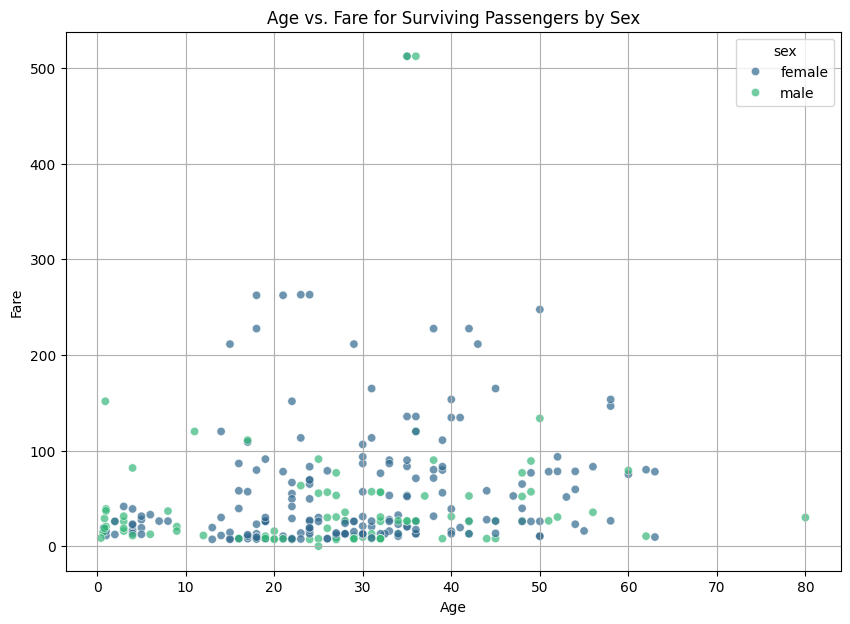

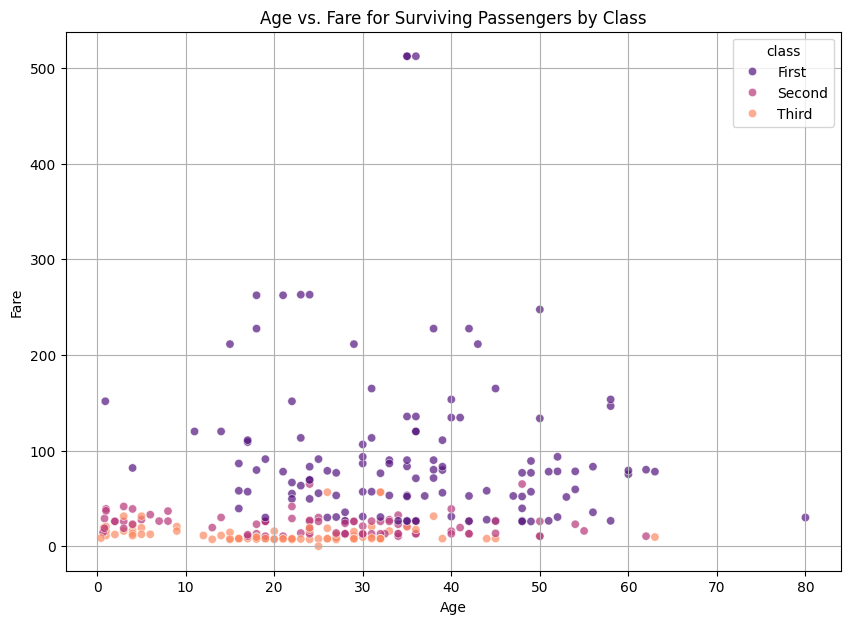

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for surviving passengers, colored by 'sex'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='fare', hue='sex', data=survivors_df, palette='viridis', alpha=0.7)
plt.title('Age vs. Fare for Surviving Passengers by Sex')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# Create a scatter plot for surviving passengers, colored by 'class'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='fare', hue='class', data=survivors_df, palette='magma', alpha=0.7)
plt.title('Age vs. Fare for Surviving Passengers by Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

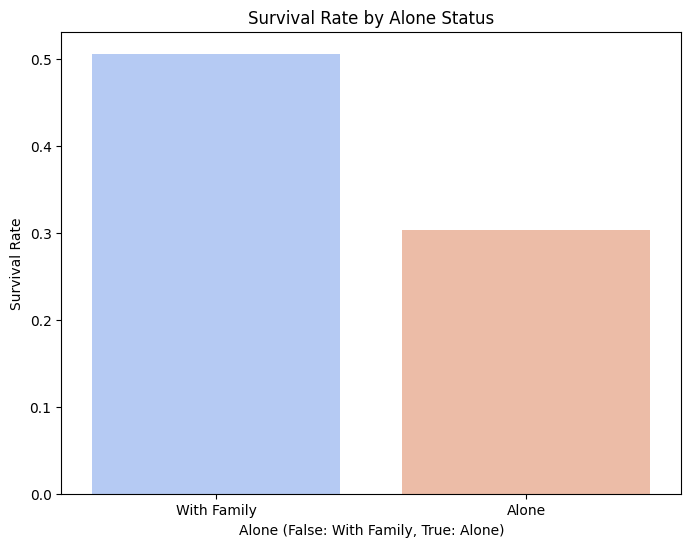

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the survival rate based on 'alone' status
survival_rate_alone = titanic.groupby('alone')['survived'].mean().reset_index()

# Create a bar plot for the survival rate based on 'alone' status
plt.figure(figsize=(8, 6))
sns.barplot(x='alone', y='survived', data=survival_rate_alone, palette='coolwarm', hue='alone', legend=False)
plt.title('Survival Rate by Alone Status')
plt.xlabel('Alone (False: With Family, True: Alone)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['With Family', 'Alone']) # Label for better understanding
plt.show()

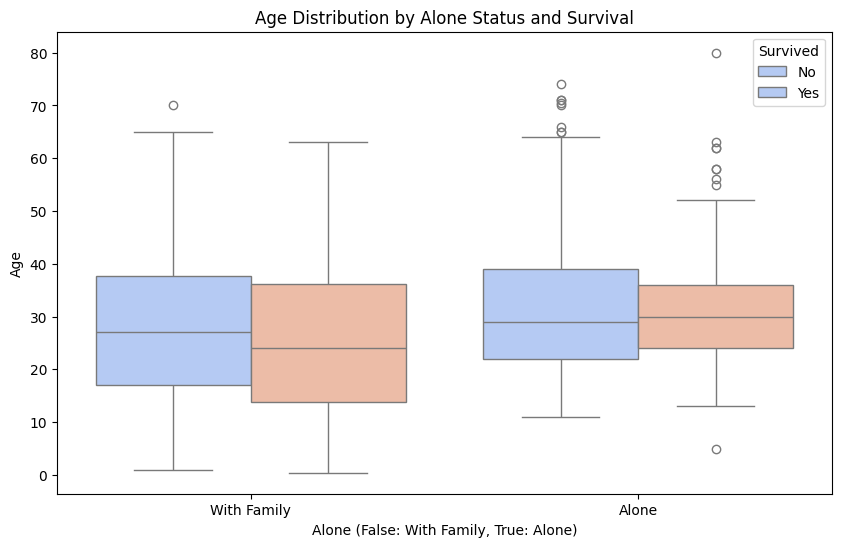

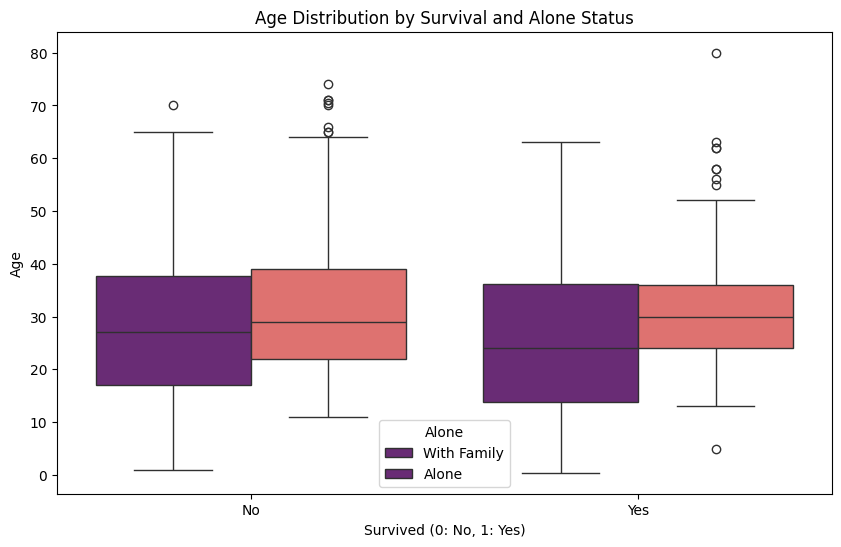

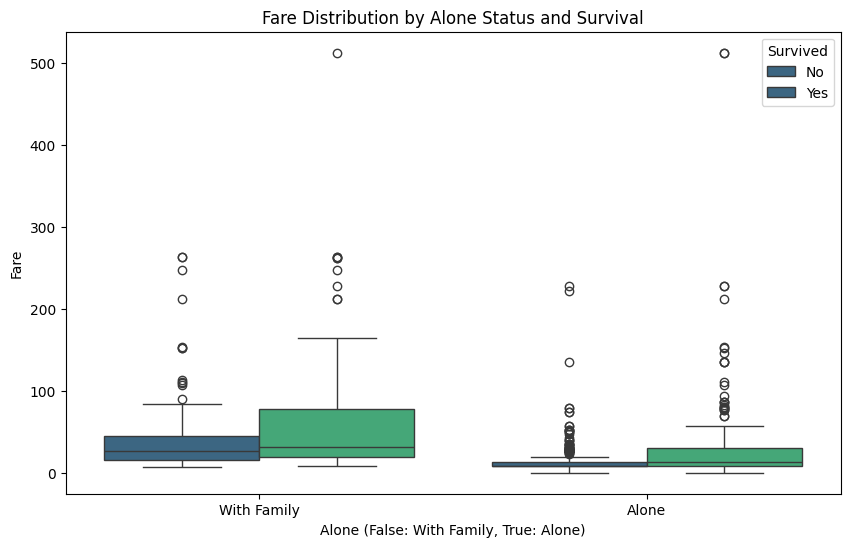

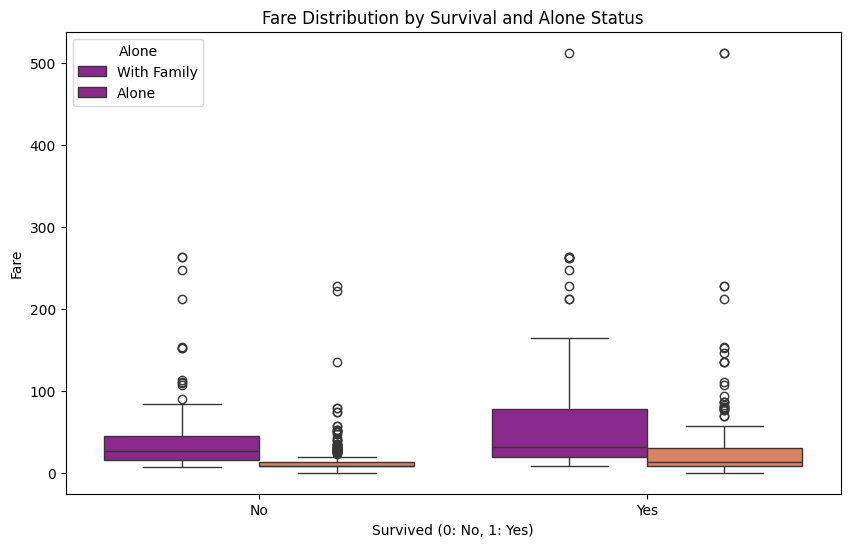

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot 1: Age distribution by 'alone' status with 'survived' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='alone', y='age', hue='survived', data=titanic, palette='coolwarm')
plt.title('Age Distribution by Alone Status and Survival')
plt.xlabel('Alone (False: With Family, True: Alone)')
plt.ylabel('Age')
plt.xticks([0, 1], ['With Family', 'Alone']) # Label for better understanding
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Box plot 2: Age distribution by 'survived' status with 'alone' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', hue='alone', data=titanic, palette='magma')
plt.title('Age Distribution by Survival and Alone Status')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Alone', labels=['With Family', 'Alone'])
plt.show()

# Box plot 3: Fare distribution by 'alone' status with 'survived' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='alone', y='fare', hue='survived', data=titanic, palette='viridis')
plt.title('Fare Distribution by Alone Status and Survival')
plt.xlabel('Alone (False: With Family, True: Alone)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Box plot 4: Fare distribution by 'survived' status with 'alone' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='fare', hue='alone', data=titanic, palette='plasma')
plt.title('Fare Distribution by Survival and Alone Status')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Alone', labels=['With Family', 'Alone'])
plt.show()

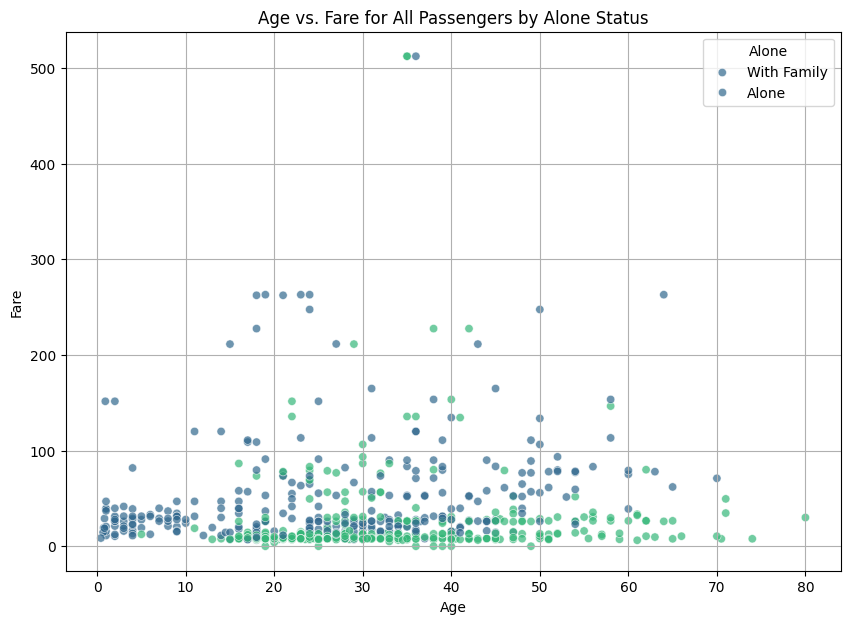

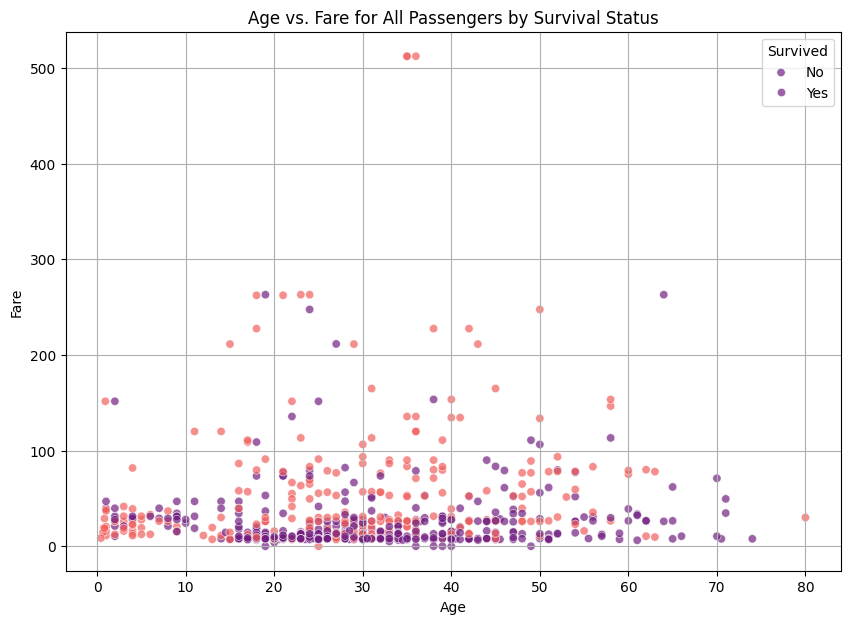

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot 1: Age vs. Fare by Alone Status
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='fare', hue='alone', data=titanic, palette='viridis', alpha=0.7)
plt.title('Age vs. Fare for All Passengers by Alone Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.legend(title='Alone', labels=['With Family', 'Alone']) # Custom labels for 'alone' boolean
plt.show()

# Scatter plot 2: Age vs. Fare by Survival Status
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic, palette='magma', alpha=0.7)
plt.title('Age vs. Fare for All Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.legend(title='Survived', labels=['No', 'Yes']) # Custom labels for 'survived' boolean
plt.show()